In [1]:

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))

['kc_house_data.csv']


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization

In [3]:
#Reading csv file into pandas dataframe
dataset = pd.read_csv('../input/kc_house_data.csv')

In [4]:
#Part of EDA - Explore the data
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#Part of EDA - List few values 
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Checking the price values
pd.options.display.float_format = '${:,.0f}'.format
dataset['price'].describe()

count      $21,613
mean      $540,088
std       $367,127
min        $75,000
25%       $321,950
50%       $450,000
75%       $645,000
max     $7,700,000
Name: price, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'price(Units of $1000)')]

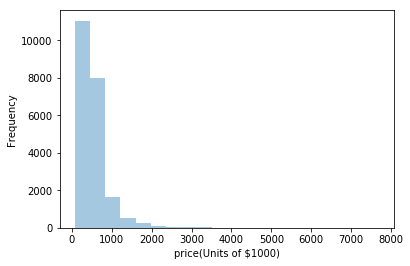

In [7]:
#Checking how the price value is distributed
import seaborn as sns
from scipy.stats import norm
ax = sns.distplot(dataset['price']/1000, bins=20, kde=False);
ax.set(xlabel='price(Units of $1000)', ylabel='Frequency')

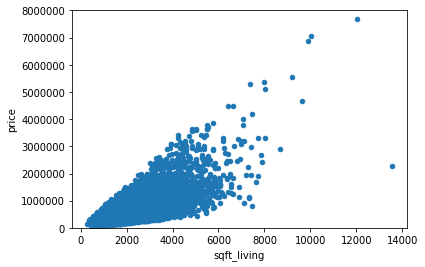

In [12]:
#Checking the training data to see the pattern between size of home and price
data = pd.concat([dataset['price'], dataset['sqft_living']], axis=1)
data.plot.scatter(x='sqft_living', y='price', ylim=(3,8000000));

In [13]:
print("Rows & Columns of the dataset: ", dataset.shape)

Rows & Columns of the dataset:  (21613, 21)


In [14]:
#Check for missing data
missing_values = dataset.isnull().sum().sort_values(ascending=False)
missing_values.head(100)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

In [15]:
#Training the model to predict the price based on one feature - Sqft_living
space = dataset['sqft_living']
price = dataset['price']
x = np.array(space).reshape(-1, 1)
y = np.array(price)

In [17]:
#Allocation 20% of the data for validation or testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 0)

In [18]:
#Checking the total size of training and test dataset
print("Training set size: ",len(xtrain))
print("Training result size:", len(ytrain))
print("Test set size: ",len(xtest))
print("Test result size: ",len(ytest))

Training set size:  17290
Training result size: 17290
Test set size:  4323
Test result size:  4323


In [20]:
#Training the linear regression model with one feature data - xtrain and results ytrain 
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#Accuracy after training with one feature dataset
accuracy = regression.score(xtest, ytest)
#Formatting accuracy value to be a percentage value
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 48%'

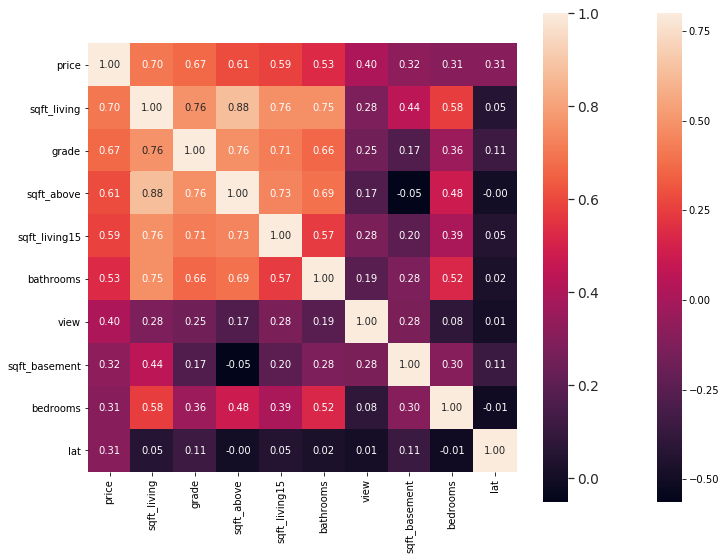

In [22]:
#Generating heatmap to find top 10 features that correlate with price of house
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 10 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
#Creating multiple linear regression based on important features selected from heatmap above
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 
                'sqft_living15', 'view', 'sqft_basement', 'lat']
predictors = dataset[feature_cols]
price = dataset['price']


In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(predictors,price,test_size=0.2,random_state = 0)

In [28]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
accuracy = regressor.score(xtest, ytest)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 64%'